In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('data/Final23_1_salary.csv')

In [3]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [4]:
df.shape

(3755, 11)

In [5]:
df.nunique()

work_year                4
experience_level         4
employment_type          4
job_title               93
salary                 815
salary_currency         20
salary_in_usd         1035
employee_residence      78
remote_ratio             3
company_location        72
company_size             3
dtype: int64

In [6]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [7]:
df.duplicated().sum()

1171

In [8]:
[feature for feature in df.columns if df[feature].duplicated().sum()]

['work_year',
 'experience_level',
 'employment_type',
 'job_title',
 'salary',
 'salary_currency',
 'salary_in_usd',
 'employee_residence',
 'remote_ratio',
 'company_location',
 'company_size']

In [9]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 4 numerical features : ['work_year', 'salary', 'salary_in_usd', 'remote_ratio']

We have 7 categorical features : ['experience_level', 'employment_type', 'job_title', 'salary_currency', 'employee_residence', 'company_location', 'company_size']


In [10]:
df[numeric_features].describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [11]:
df[categorical_features].describe()

,experience_level,employment_type,job_title,salary_currency,employee_residence,company_location,company_size
count,3755,3755,3755,3755,3755,3755,3755
unique,4,4,93,20,78,72,3
top,SE,FT,Data Engineer,USD,US,US,M
freq,2516,3718,1040,3224,3004,3040,3153


## Data Visualisation

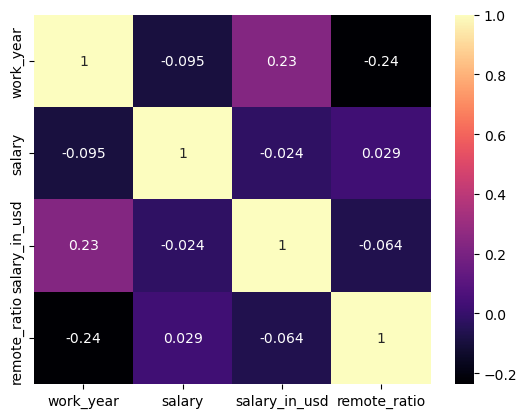

In [41]:
sns.heatmap(df.corr(), annot = True, cmap = "magma")
plt.show()

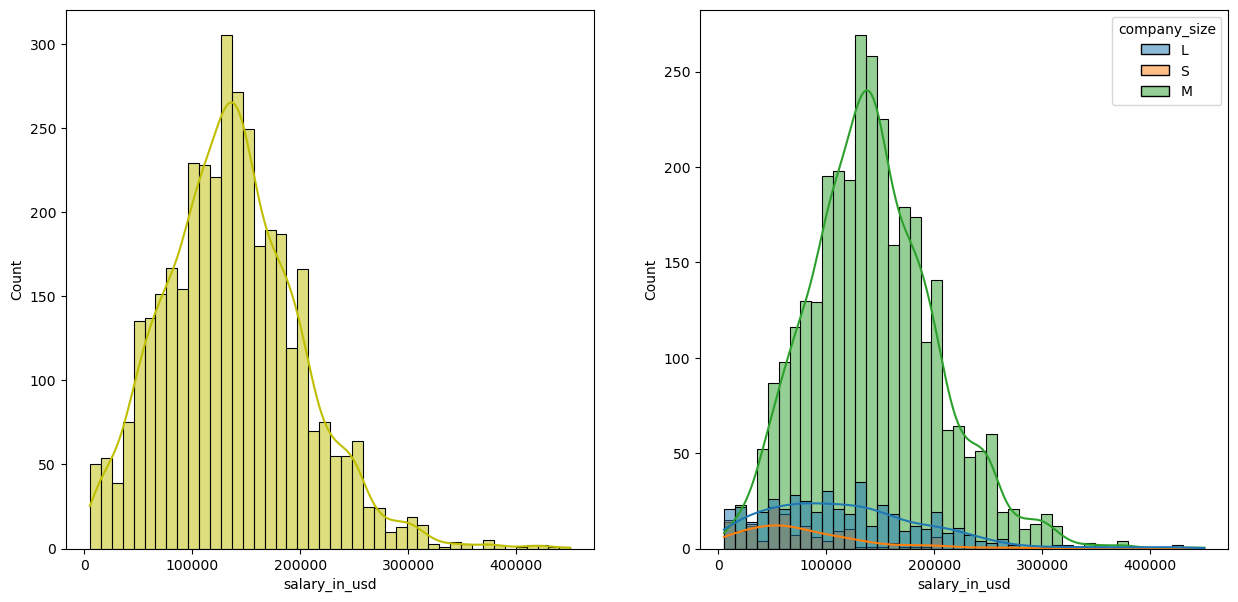

137570
company_size
L    118301.0
M    143131.0
S     78227.0
Name: salary_in_usd, dtype: float64


In [17]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='salary_in_usd',kde=True,color='y')
plt.subplot(122)
sns.histplot(data=df,x='salary_in_usd',kde=True,hue='company_size')
plt.show()



sal_usd_mean = round(df['salary_in_usd'].mean())
sal_mean_comp = round(df.groupby('company_size')['salary_in_usd'].mean())
print(sal_usd_mean)
print(sal_mean_comp)

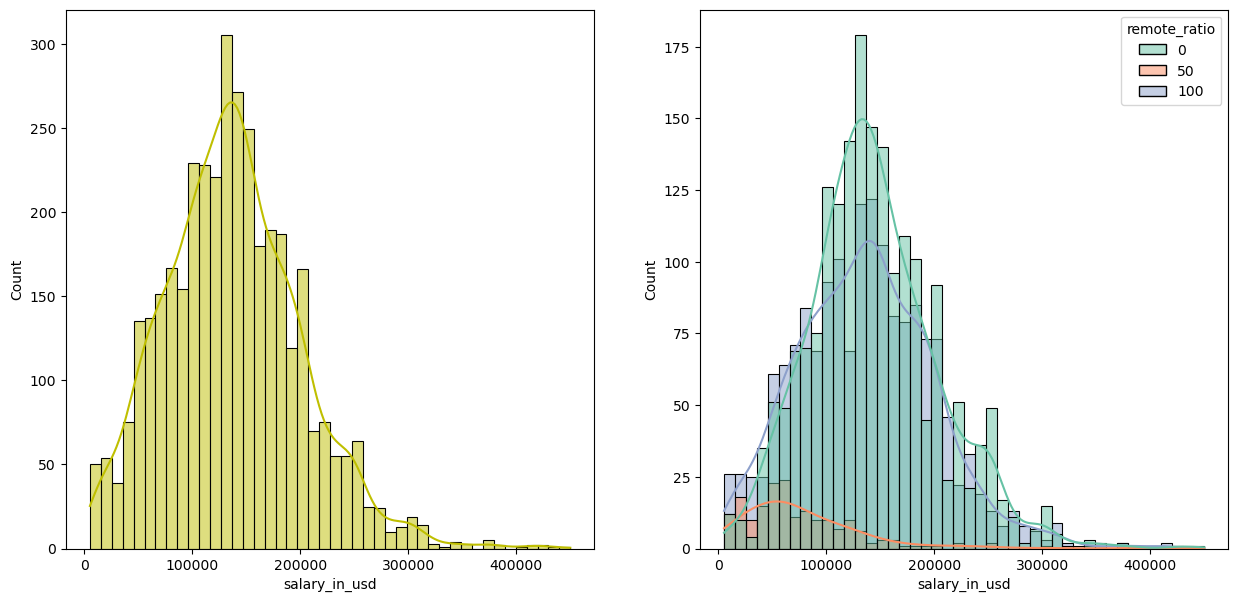

,salary_in_usd
remote_ratio,
0,144316.0
50,78401.0
100,136481.0


In [24]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='salary_in_usd',kde=True,color='y')
plt.subplot(122)
unique_remote_ratio = df['remote_ratio'].unique()
colors = sns.color_palette('Set2', n_colors=len(unique_remote_ratio))
sns.histplot(data=df,x='salary_in_usd',kde=True,hue='remote_ratio',palette=colors)
plt.show()

sal_mean_rr = round(df.groupby('remote_ratio')['salary_in_usd'].mean())
sal_mean_rr=pd.DataFrame(sal_mean_rr)
sal_mean_rr

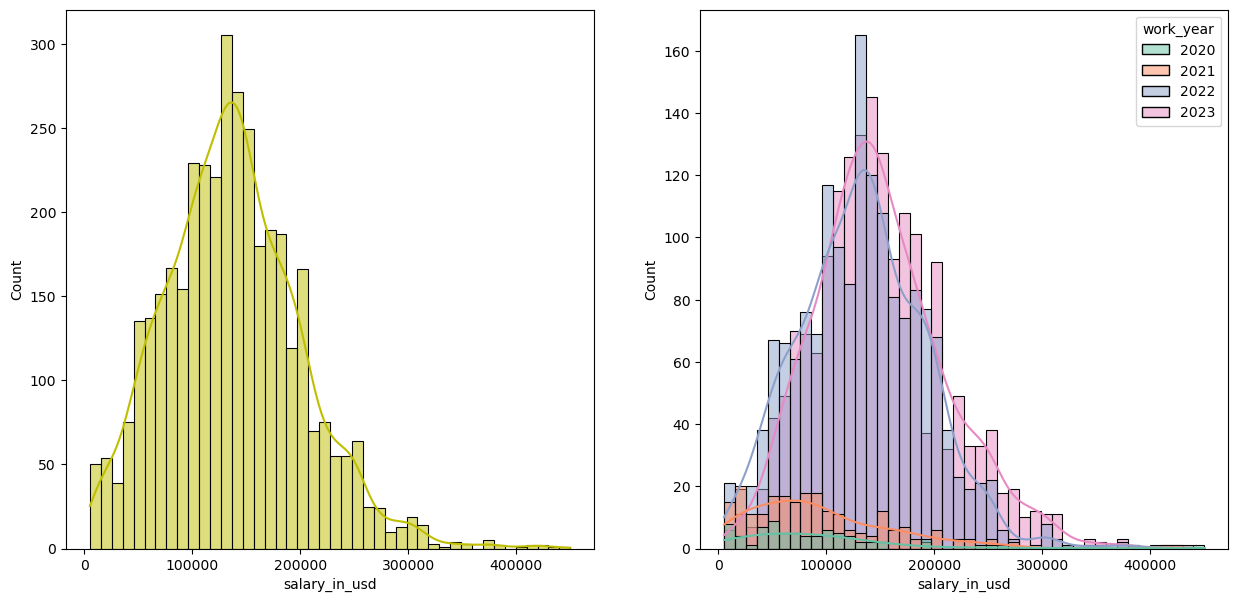

,salary_in_usd
work_year,
2020,92303.0
2021,94087.0
2022,133339.0
2023,149046.0


In [26]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df, x='salary_in_usd', kde=True, color='y')
plt.subplot(122)
unique_work_years = df['work_year'].unique()
colors = sns.color_palette('Set2', n_colors=len(unique_work_years))
sns.histplot(data=df, x='salary_in_usd', kde=True, hue='work_year', palette=colors)

plt.show()


sal_mean_wrk_yr = round(df.groupby('work_year')['salary_in_usd'].mean())
sal_mean_wrk_yr=pd.DataFrame(sal_mean_wrk_yr)
sal_mean_wrk_yr

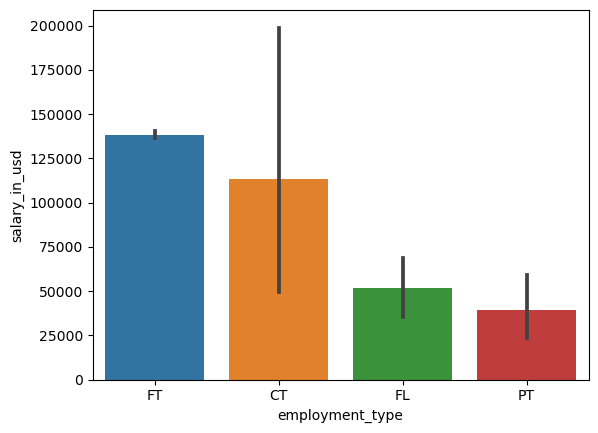

In [61]:
sns.barplot(x='employment_type',y='salary_in_usd',data=df)
plt.show()

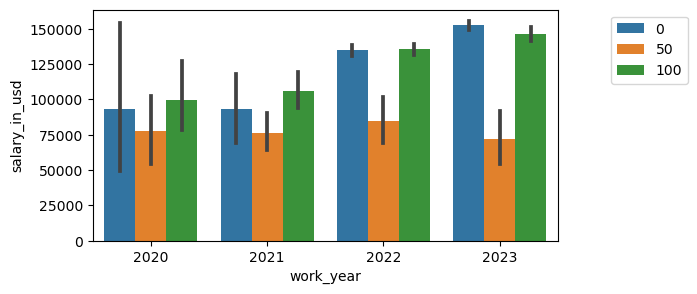

In [60]:
plt.figure(figsize=(6, 3))  
sns.barplot(x='work_year', y='salary_in_usd', data=df, hue='remote_ratio')
plt.legend(bbox_to_anchor=(1.1, 1))
plt.show()


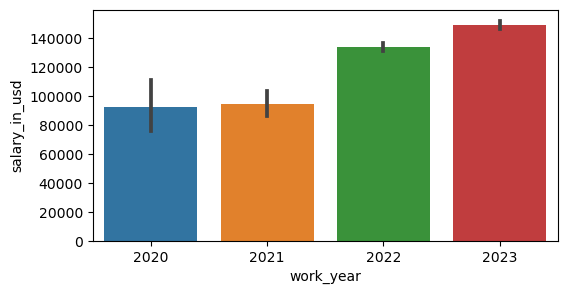

In [28]:
plt.figure(figsize=(6, 3))  
sns.barplot(x='work_year', y='salary_in_usd', data=df)
plt.show()

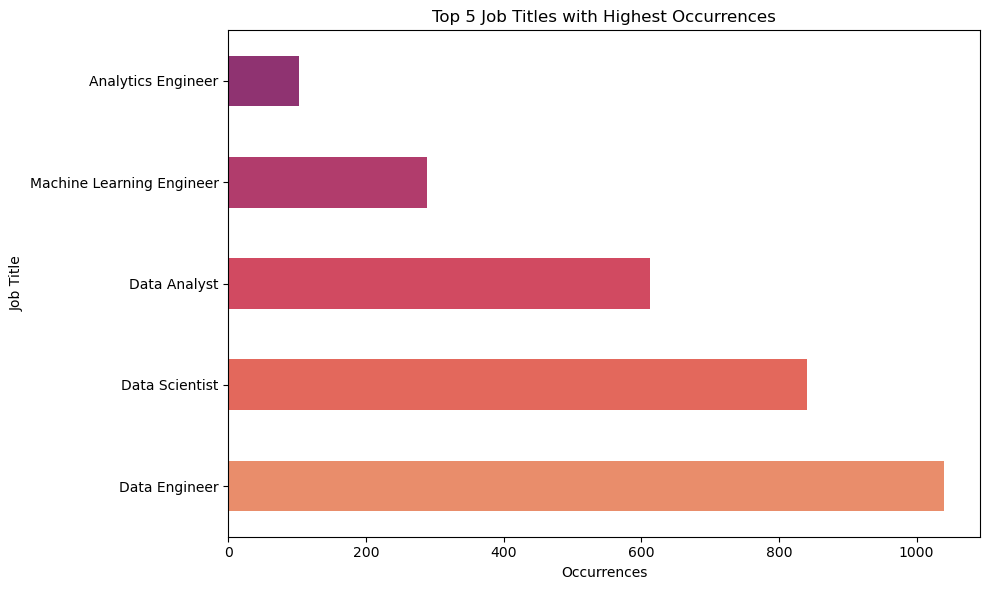

Data Engineer                1040
Data Scientist                840
Data Analyst                  612
Machine Learning Engineer     289
Analytics Engineer            103
Name: job_title, dtype: int64

In [13]:
top_5_job_titles = df['job_title'].value_counts().head(5)

colors = sns.color_palette('flare')

plt.figure(figsize=(10, 6))
top_5_job_titles.plot(kind='barh', color=colors)
plt.xlabel('Occurrences')
plt.ylabel('Job Title')
plt.title('Top 5 Job Titles with Highest Occurrences')
plt.tight_layout()

plt.show()
top_5_job_titles


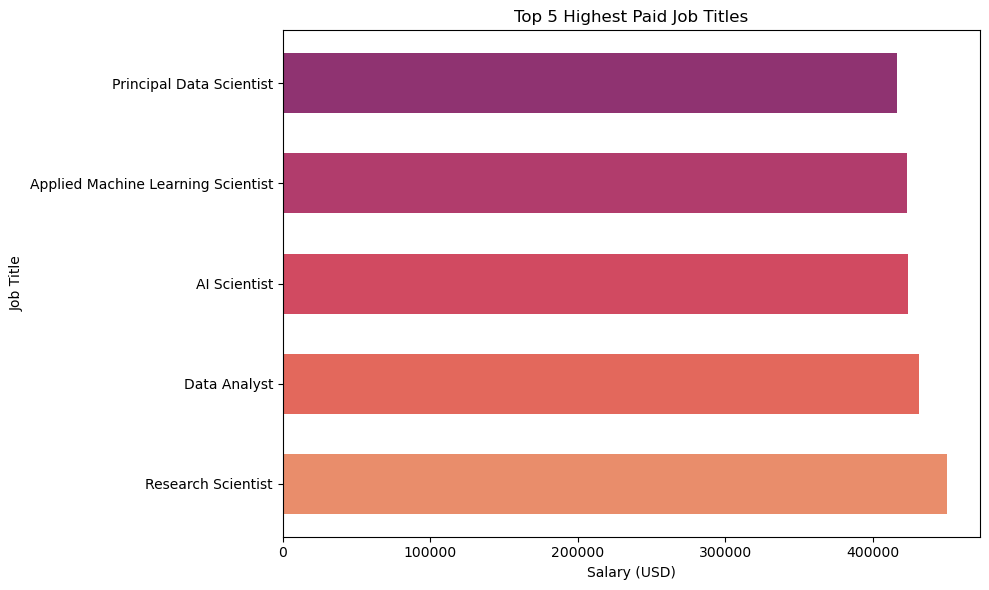

,job_title,salary_in_usd
1,Research Scientist,450000
2,Data Analyst,430967
3,AI Scientist,423834
4,Applied Machine Learning Scientist,423000
5,Principal Data Scientist,416000


In [14]:
sorted_df = df.sort_values('salary_in_usd', ascending=False)

top_jobs = sorted_df[['job_title', 'salary_in_usd']].head(5)
top_jobs.reset_index(drop=True, inplace=True)
top_jobs.index = top_jobs.index + 1



colors = sns.color_palette('flare')
plt.figure(figsize=(10,6))
plt.barh(top_jobs['job_title'], top_jobs['salary_in_usd'], color=colors, height=0.6)
plt.xlabel('Salary (USD)')
plt.ylabel('Job Title')
plt.title('Top 5 Highest Paid Job Titles')
plt.tight_layout()

plt.show()
top_jobs